<a href="https://colab.research.google.com/github/lucky17717/Diabietes_data_prediction/blob/main/LinearRegrassion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression

In [4]:
import numpy as np

class Linear_Regression():
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0

        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)

        # calculate gradient
        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = - 2 * np.sum(self.Y - Y_prediction) / self.m

        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        return X.dot(self.w) + self.b


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Data Pre - Processing

In [43]:
# loading the data
salary_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/salary_data.csv')

In [44]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [45]:
salary_data.info()
salary_data.describe()
salary_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


,0
YearsExperience,0
Salary,0


In [46]:
salary_data.shape

(30, 2)

In [47]:
# SPliting the data in feature selction and target
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [48]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [49]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [50]:
# Training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2, random_state = 2)

Traning the data into Linear regression

In [51]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

In [52]:
model.fit(X_train,Y_train)

In [53]:
# printing the perameter value

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9570.888860991548
bias =  24384.029598697263


In [54]:
test_data_prediction = model.predict(X_test)

In [55]:
print(test_data_prediction)

[36826.18511799 34912.00734579 67453.02947316 59796.31838437
 92337.34051174 81809.36276465]


Visualizing the predicted values and actual Values

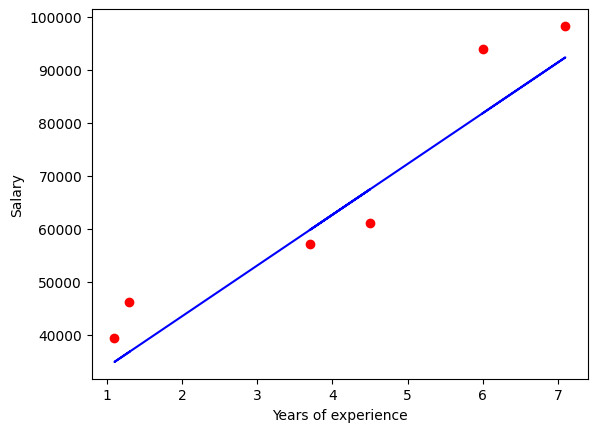

In [56]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

Logistic Regression mode making

In [57]:
import numpy as np

class Logistic_Regression():
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):
    self.m, self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    y_hat = 1 / (1 + np.exp(-(self.X.dot(self.w) + self.b)))

    dw = (1 / self.m) * np.dot(self.X.T, (y_hat - self.Y))
    db = (1 / self.m) * np.sum(y_hat - self.Y)

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self, X):
    y_pred = 1 / (1 + np.exp(-(X.dot(self.w) + self.b)))
    y_pred = np.where(y_pred > 0.5, 1, 0)
    return y_pred


In [58]:
import pandas as pd
import io
import requests

# Direct download link with dl=1
url = 'https://www.dropbox.com/scl/fi/0uiujtei423te1q4kvrny/diabetes.csv?rlkey=20xvytca6xbio4vsowi2hdj8e&dl=1'

# Get the content using requests
response = requests.get(url)

# Read the content as a CSV
df = pd.read_csv(io.StringIO(response.text))

# Preview the DataFrame
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [60]:
df.shape

(768, 9)

In [61]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,8].values

In [62]:
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [63]:
print(Y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2, random_state = 42)

In [65]:
model =  Logistic_Regression(0.01,1000)

In [66]:
model.fit(X_train, Y_train)
X_test_prediction = model.predict(X_test)


In [67]:
X_train_pridiction = model.predict(X_train)
X_train_accuracy = accuracy_score(Y_train,X_train_pridiction)

In [68]:
print(X_train_accuracy)

0.6742671009771987


In [69]:
X_test_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Test Accuracy:", X_test_accuracy)

Test Accuracy: 0.6948051948051948


In [74]:
input_data = (5,166,72,19,175,25.8,0.587,51)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction == 0):
  print("Person is not diabetic")
else:
  print("Person is diabetic")

[1]
Person is diabetic


Support Vector machine

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [79]:
diebities_data = pd.read_csv('/content/drive/MyDrive/your_folder/diabetes.csv?rlkey=20xvytca6xbio4vsowi2hdj8e&e=1&st=1tii87gl&dl=0')

In [80]:
diebities_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [81]:
diebities_data.info()
diebities_data.describe()
diebities_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [82]:
diebities_data.shape

(768, 9)

In [83]:
feature = diebities_data.drop(columns = 'Outcome', axis = 1)
target = diebities_data['Outcome']

In [84]:
print(feature)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [86]:
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [87]:
scaler = StandardScaler()

In [91]:
scaler.fit(feature)

StandardScaler()

In [92]:
standerdize_data = scaler.transform(feature)

In [93]:
print(standerdize_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [94]:
feature = standerdize_data
target = diebities_data['Outcome']

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(feature,target,test_size =0.2, random_state = 42)

In [96]:
model = SVC(kernel = 'linear')

In [97]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [98]:
X_train_pridiction = model.predict(X_train)
X_train_accuracy = accuracy_score(Y_train,X_train_pridiction)

In [99]:
print(X_train_accuracy)

0.7719869706840391


In [100]:
Y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, Y_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7597402597402597


In [103]:
input_data = (1,85,66,29,0,26.6,0.351,31)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if prediction == 0:
  print("Person is not diabetic")
else:
  print("Person is diabetic")

[[-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]]
[0]
Person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
